In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# -----------------------------------------------------------
# Load results
# -----------------------------------------------------------
df = pd.read_csv("scan_results_gc_gv.csv")
display(df)

,gc,gv,Fidelity,Concurrence
0,0.002,0.000500,0.707007,0.001036
1,0.002,0.000697,0.707009,0.001011
2,0.002,0.000894,0.707012,0.000974
3,0.002,0.001091,0.707023,0.000912
4,0.002,0.001288,0.707027,0.000858
...,...,...,...,...
9995,0.125,0.019212,0.757190,0.240664
9996,0.125,0.019409,0.755279,0.236874
9997,0.125,0.019606,0.749252,0.218353
9998,0.125,0.019803,0.746886,0.244326


In [4]:
# -----------------------------------------------------------
# Add relative quantities
# -----------------------------------------------------------
df["gv_gc"] = df["gv"] / df["gc"]
df["gc_gv"] = df["gc"] / df["gv"]


Correlation with Fidelity:
Fidelity       1.000000
gc             0.228391
gv_gc          0.201659
gv             0.089043
gc_gv          0.005273
Concurrence   -0.008574
Name: Fidelity, dtype: float64

Correlation with Concurrence:
Concurrence    1.000000
gc             0.652901
gc_gv          0.527460
Fidelity      -0.008574
gv            -0.161469
gv_gc         -0.331734
Name: Concurrence, dtype: float64


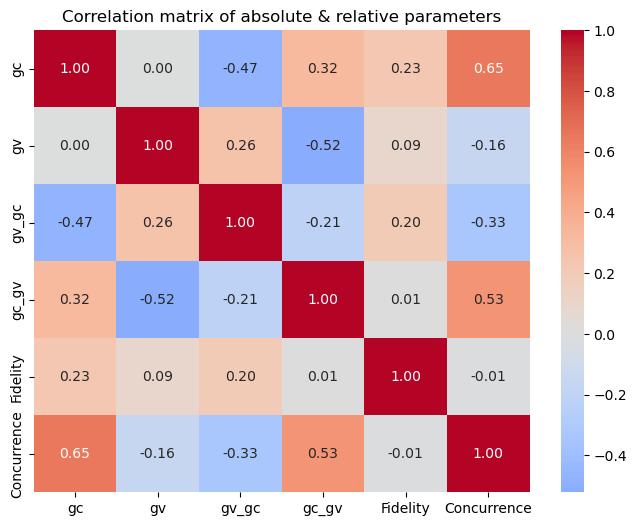

In [5]:
corr = df[["gc", "gv","gv_gc", "gc_gv", "Fidelity", "Concurrence"]].corr()

print("Correlation with Fidelity:")
print(corr["Fidelity"].sort_values(ascending=False))
print("\nCorrelation with Concurrence:")
print(corr["Concurrence"].sort_values(ascending=False))

# Heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation matrix of absolute & relative parameters")
plt.show()

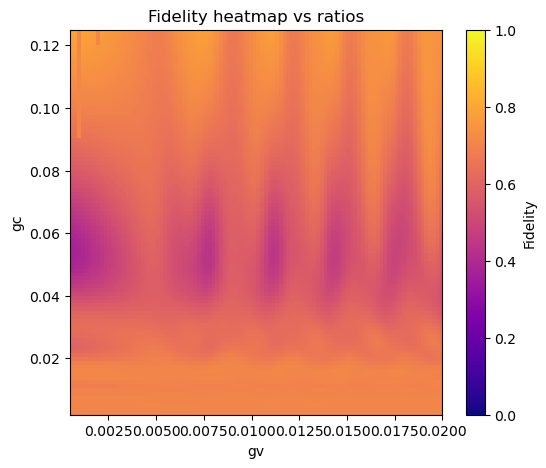

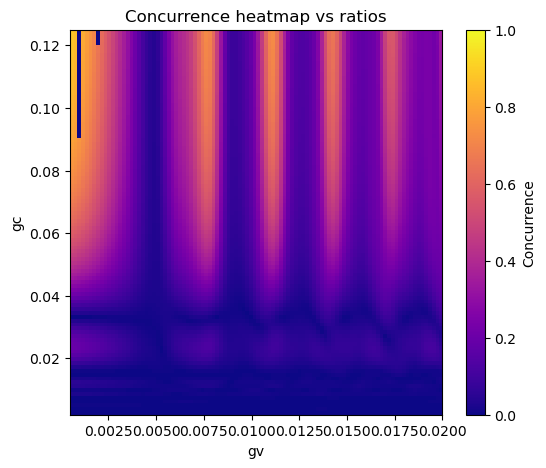

In [7]:
# -----------------------------------------------------------
# Heatmaps in ratio space (gv/gc, wv/wqc)
# -----------------------------------------------------------
def plot_ratio_heatmap(df, quantity="Fidelity"):
    """Heatmap of chosen quantity in (gv/gc, wv/wqc) space."""
    pivot = df.pivot_table(index="gc", columns="gv", values=quantity, aggfunc="mean")
    pivot = pivot.sort_index().sort_index(axis=1)

    plt.figure(figsize=(6,5))
    plt.imshow(pivot.values,
               extent=[pivot.columns.min(), pivot.columns.max(),
                       pivot.index.min(), pivot.index.max()],
               origin="lower", aspect="auto", cmap="plasma",
               vmin=0, vmax=1)
    plt.colorbar(label=quantity)
    plt.xlabel("gv")
    plt.ylabel("gc")
    plt.title(f"{quantity} heatmap vs ratios")
    plt.show()

# Example usage: plot in ratio space
plot_ratio_heatmap(df, quantity="Fidelity")
plot_ratio_heatmap(df, quantity="Concurrence")

In [ ]:
# Unique vibrational frequencies (sorted)
wv_values = sorted(df["wv"].unique()[3:8])

# Set up subplots
ncols = len(wv_values)
fig, axes = plt.subplots(1, ncols, figsize=(5*ncols, 4), sharey=True)

for i, wv_sel in enumerate(wv_values):
    ax = axes[i] if ncols > 1 else axes

    df_slice = df[np.isclose(df["wv"], wv_sel, atol=1e-6)]

    # Pivot to get a 2D grid of Fidelity vs gc, gv
    pivot = df_slice.pivot(index="gv", columns="gc", values="Fidelity")
    pivot = pivot.sort_index().sort_index(axis=1)

    im = ax.imshow(pivot.values,
                   extent=[pivot.columns.min(), pivot.columns.max(),
                           pivot.index.min(), pivot.index.max()],
                   origin="lower", aspect="auto", cmap="viridis",
                   vmin=0, vmax=1)

    ax.set_title(f"wv = {wv_sel:.3f}")
    ax.set_xlabel("gc")
    if i == 0:
        ax.set_ylabel("gv")

fig.suptitle("Fidelity vs (gc, gv) at different vibrational frequencies", fontsize=14)
fig.colorbar(im, ax=axes.ravel().tolist(), label="Fidelity")

plt.tight_layout()
plt.show()


In [24]:
import json
def read_json_to_dict(filename: str) -> dict:
    with open(filename, 'r') as f:
        return json.load(f)
LiH_params = read_json_to_dict("LiH_params.json")

omega_v = LiH_params["w_vib1"]
omega_c = LiH_params["w_cav"]
mu_eg = LiH_params["qubit_1_dipole_moments"]["mu_eg"]

S = LiH_params["S_1"]
lam = LiH_params["lambda_1"]

lam = 0.5
S = 0.1

gv = omega_v * np.sqrt(S)
gc = np.abs( np.sqrt(omega_c/2) * lam * mu_eg)

print(F"Base value of gv assuming S   = {S} is {gv}")
print(F"Base value of gc assuming lam = {lam} is {gc}")

Base value of gv assuming S   = 0.1 is 0.0019698238641284657
Base value of gc assuming lam = 0.5 is 0.1270702564792467


In [1]:
# -----------------------------------------------------------
# Add relative quantities
# -----------------------------------------------------------
# You fixed wc = wq, so use first value as reference
#wc_ref = df["wv"].max() * 0 + 0.12086   # or explicitly set to the wc you used
# Better: if you stored wc in LiH_params, load that instead.
# For now, assume wc = 0.1 (replace with your actual fixed value).
wc_ref = 0.12086

df["gv_gc"] = df["gv"] / df["gc"]
df["wv_wc"] = df["wv"] / df["wqc"]





NameError: name 'df' is not defined

In [ ]:
corr = df[["gc", "gv", "wv", "gv_gc", "wv_wc", "Fidelity", "Concurrence"]].corr()

print("Correlation with Fidelity:")
print(corr["Fidelity"].sort_values(ascending=False))
print("\nCorrelation with Concurrence:")
print(corr["Concurrence"].sort_values(ascending=False))

# Heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation matrix of absolute & relative parameters")
plt.show()

In [ ]:
# -----------------------------------------------------------
# Pairplot: color by Fidelity
# -----------------------------------------------------------
sns.pairplot(
    df[["gc", "gv", "wv", "gv_gc", "wv_wc", "Fidelity"]],
    diag_kind="kde", corner=True,
    hue="Fidelity", palette="viridis"
)
plt.suptitle("Pairplot of absolute/relative parameters colored by Fidelity", y=1.02)
plt.show()

# -----------------------------------------------------------
# Pairplot: color by Concurrence
# -----------------------------------------------------------
sns.pairplot(
    df[["gc", "gv", "wv", "gv_gc", "wv_wc", "Concurrence"]],
    diag_kind="kde", corner=True,
    hue="Concurrence", palette="plasma"
)
plt.suptitle("Pairplot of absolute/relative parameters colored by Concurrence", y=1.02)
plt.show()

In [ ]:
# -----------------------------------------------------------
# Scatter plots
# -----------------------------------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x="gv_gc", y="Fidelity", hue="wv_wc", data=df, palette="viridis", s=60)
plt.xscale("log")
plt.xlabel("gv / gc")
plt.ylabel("Fidelity")
plt.title("Fidelity vs gv/gc, colored by wv/wc")
plt.colorbar(label="wv / wc")
plt.show()



In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="gv_gc", y="Concurrence", hue="wv_wc", data=df, palette="plasma", s=60)
plt.xscale("log")
plt.xlabel("gv / gc")
plt.ylabel("Concurrence")
plt.title("Concurrence vs gv/gc, colored by wv/wc")
plt.colorbar(label="wv / wc")
plt.show()


In [ ]:

# -----------------------------------------------------------
# Heatmap in (gv/gc, wv/wc) plane
# -----------------------------------------------------------
pivot = df.pivot_table(index="gv_gc", columns="wv_wc", values="Fidelity", aggfunc="mean")
pivot = pivot.sort_index().sort_index(axis=1)

plt.figure(figsize=(6,5))
plt.imshow(pivot.values,
           extent=[pivot.columns.min(), pivot.columns.max(),
                   pivot.index.min(), pivot.index.max()],
           origin="lower", aspect="auto", cmap="viridis",
           vmin=0, vmax=1)
plt.colorbar(label="Fidelity")
plt.xlabel("wv / wc")
plt.ylabel("gv / gc")
plt.title("Fidelity heatmap vs ratios")
plt.show()



In [ ]:
# Same for concurrence
pivot = df.pivot_table(index="gv_gc", columns="wv_wc", values="Concurrence", aggfunc="mean")
pivot = pivot.sort_index().sort_index(axis=1)

plt.figure(figsize=(6,5))
plt.imshow(pivot.values,
           extent=[pivot.columns.min(), pivot.columns.max(),
                   pivot.index.min(), pivot.index.max()],
           origin="lower", aspect="auto", cmap="plasma",
           vmin=0, vmax=1)
plt.colorbar(label="Concurrence")
plt.xlabel("wv / wc")
plt.ylabel("gv / gc")
plt.title("Concurrence heatmap vs ratios")
plt.show()

In [ ]:
corr = df[["gc", "gv", "gc_gv", "T1_gc", "T2_gc", "T_ratio", "Fidelity", "Concurrence"]].corr()
print(corr["Fidelity"])
print(corr["Concurrence"])

In [ ]:


sns.scatterplot(x="gv", y="Fidelity", data=df, hue="gc_gv", palette="viridis")
plt.xscale("log")   # sometimes helps
plt.show()

sns.scatterplot(x="T2_gc", y="Fidelity", data=df, hue="gc_gv")
plt.show()

In [ ]:
pivot = df.pivot_table(index="T1_gc", columns="T2_gc", values="Fidelity", aggfunc="mean")
plt.imshow(pivot.values,
           extent=[pivot.columns.min(), pivot.columns.max(),
                   pivot.index.min(), pivot.index.max()],
           origin="lower", aspect="auto", cmap="viridis")
plt.xlabel("T2 * gc")
plt.ylabel("T1 * gc")
plt.colorbar(label="Fidelity")
plt.show()

In [ ]:
sns.scatterplot(x="Fidelity", y="Concurrence", data=df, hue="gc_gv")
plt.show()